# Train test split


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

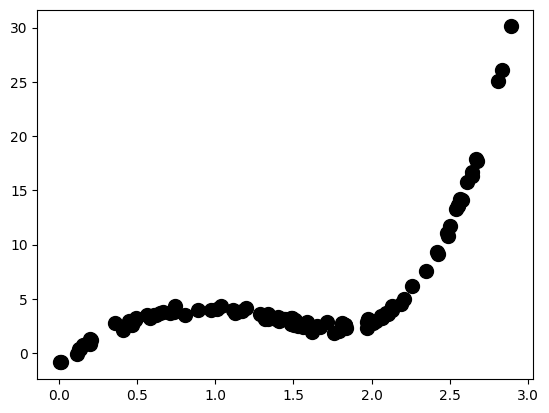

In [3]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [5]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [6]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 6.30381199,  1.70101809,  4.59532357,  2.0335477 , 18.32000189,
        1.09330104,  7.57724862, 14.31464026,  1.08864498,  1.82464533,
        1.48370303, 10.36196313,  1.14219161,  1.58350821,  8.27130307,
       17.82955942,  5.92141198,  1.21937957,  4.42383443,  2.01863365,
        6.21624728,  3.66019558,  6.90785169,  4.87280982,  7.12399673,
        9.15256802,  4.58201947,  4.002169  ,  4.51935564, 13.67597911,
        5.22281187,  4.55660488, 13.83512939, 15.28334887,  6.43924096,
        2.68050996,  1.09449399,  6.79423651,  1.87716015,  1.30447692])

In [7]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.6973867357168939
Explained variance score: 0.6973867357168939
Median absolute error: 2.8047878408787215
Mean squared error: 11.795304265071184
Mean absolute errors: 2.9202333743151647


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

degrees = [1, 2, 3, 4, 5, 25]

results = {}

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
   
    
    results[degree] = {'R2': r2, 'MSE': mse}

for degree in results:
    print(f"Stopień {degree}: R2 = {results[degree]['R2']:.3f}, MSE = {results[degree]['MSE']:.3f}")


Stopień 1: R2 = 0.482, MSE = 19.691
Stopień 2: R2 = 0.690, MSE = 11.795
Stopień 3: R2 = 0.979, MSE = 0.786
Stopień 4: R2 = 0.998, MSE = 0.066
Stopień 5: R2 = 0.998, MSE = 0.073
Stopień 25: R2 = -8.160, MSE = 348.220
